
Applying bootstrap resampling to a K-Nearest Neighbors (KNN) classifier can be challenging due to the nature of KNN's decision boundaries. KNN relies on the proximity of data points, and bootstrapping—sampling with replacement—can lead to high overlap between training subsets, resulting in similar models that don't effectively reduce variance. This overlap diminishes the benefits of bagging, a technique that combines multiple models to improve stability and accuracy. 
STATS.STACKEXCHANGE.COM

Instead of bootstrapping, consider using the Random Subspace Method, which involves training each model on a random subset of features. This approach can enhance the diversity of the models and improve performance. 
STATS.STACKEXCHANGE.COM

Alternatively, ensemble methods like BaggingClassifier in scikit-learn can be used with KNN to create an ensemble of KNN classifiers trained on different subsets of the data. This method can help reduce variance and improve the robustness of the model. 
EDUCATIONALRESEARCHTECHNIQUES.COM

In summary, while bootstrap resampling with KNN is not typically recommended due to the classifier's sensitivity to data overlap, exploring ensemble methods like Random Subspace or BaggingClassifier can be more effective strategies for improving model performance.

In [15]:
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
train_data = pd.read_csv('train_data.csv')
y_train = train_data['Grade'] # series not df
X_train = train_data.drop(columns=['Grade'])

test_data = pd.read_csv('test_data.csv')
y_test = test_data['Grade']
X_test = test_data.drop(columns=['Grade'])

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           847 non-null    float64
 1   Temperature  847 non-null    float64
 2   Colour       847 non-null    float64
 3   Taste        847 non-null    int64  
 4   Odor         847 non-null    int64  
 5   Fat          847 non-null    int64  
 6   Turbidity    847 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 46.4 KB
<class 'pandas.core.series.Series'>
RangeIndex: 847 entries, 0 to 846
Series name: Grade
Non-Null Count  Dtype
--------------  -----
847 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


Base Model

In [17]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Fit the KNN classifier on the training data
knn.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = knn.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")

Test set accuracy: 0.9764


In [22]:
from sklearn.metrics import f1_score

# Fit the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate F1-score on test data
test_f1 = f1_score(y_test, y_pred, average="weighted")

# Print the F1-score
print(f"Test set F1-score: {test_f1:.4f}")


Test set F1-score: 0.9764


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [5],         # Number of neighbors to consider
    'weights':['uniform'],        # Weight function used in prediction
    'metric': ["minkowski"]      # Distance metric
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation and F1-score as the scoring metric
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best F1-score from cross-validation
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best F1-Score (from cross-validation): {grid_search.best_score_:.4f}")

# Get the F1-score for the best model on the test data
y_pred = grid_search.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='weighted')

# Print the test F1-score
print(f"Test set F1-score: {test_f1:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Best F1-Score (from cross-validation): 0.9941
Test set F1-score: 0.9764


model with tuning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': list(range(3, 15)),         # Number of neighbors to consider
    'weights': ['uniform', 'distance'],     # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']    # Distance metric
}

# Initialize GridSearchCV with cross-validation and the parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring="f1_macro",n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test data
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Get the F1-score for the best model on the test data
y_pred = grid_search.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='weighted')

# Print the test F1-score
print(f"Test set F1-score: {test_f1:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9987
Test set accuracy: 0.9953
Test set F1-score: 0.9953


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007391,0.001226,0.025102,0.002552,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.994737,1.0,0.981827,0.99362,1.0,0.994037,0.006646,54
1,0.007556,0.003882,0.009712,0.000991,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",1.000000,1.0,0.993586,1.00000,1.0,0.998717,0.002566,1
2,0.005244,0.001113,0.018956,0.001306,euclidean,4,uniform,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.994737,1.0,0.987108,0.99362,1.0,0.995093,0.004779,37
3,0.004918,0.001204,0.007241,0.001399,euclidean,4,distance,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",1.000000,1.0,0.993586,1.00000,1.0,0.998717,0.002566,1
4,0.004913,0.001774,0.022494,0.003640,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.989519,1.0,0.987108,0.99362,1.0,0.994049,0.005286,52


In [47]:
import altair as alt
import pandas as pd

# Get the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Create a base Altair chart with line and scatter plots
base = alt.Chart(results).encode(
    x=alt.X('param_n_neighbors:O', title="n_neighbors"),  # Treat `param_n_neighbors` as ordinal for line chart
    y=alt.Y('mean_test_score:Q', title="F1-Score", scale=alt.Scale(domain=[0.94, 1])),    # Quantitative for the test score
)

# Line plot for the mean_test_score vs param_n_neighbors, colored by param_weights
line_plot = base.mark_line().encode(
    color=alt.Color('param_weights:N', title="weights"),  # Different colors for each weight type
    detail='param_weights:N'  # Ensure line segmentation by param_weights
)

# Scatter plot for the mean_test_score vs param_n_neighbors, colored by param_weights
scatter_plot = base.mark_point(filled=True, size=100).encode(
    color='param_weights:N',  # Different colors for each weight type
)

# Combine the line and scatter plots, and facet by `param_metric`
final_chart = (line_plot + scatter_plot).facet(
    column=alt.Column('param_metric:N', title="metric"),  # Separate the plots by `param_metric`
).resolve_scale(
    y='shared'  # Share the y-axis scale across facets
)

# Display the chart
final_chart


alt.FacetChart(...)

Why the mean test score stays the same when using distance metric?

Feature Scaling: In the distance metric, the distances between points are sensitive to the scale of the features. If the features are already normalized or standardized, increasing the number of neighbors may not impact the distance calculations significantly, thus resulting in a constant score.

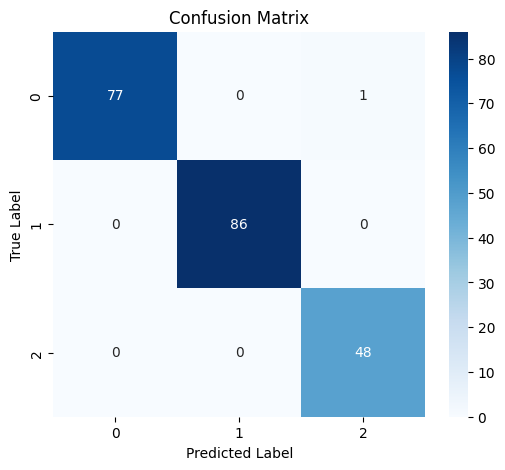

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
